# Desafío Empresarial: Análisis de Cohortes para los Pagos de Ironhack (Proyecto 1)

##### Setup: cargar librerías necesarias

In [122]:
# Importing the NumPy library for numerical operations (as np)
import numpy as np
# Importing the Pandas library for data manipulation and analysis (as pd)
import pandas as pd

# Importing the Seaborn library for advanced data visualization (as sns)
import seaborn as sns
# Importing the Matplotlib library for basic plotting functionalities (as plt)
import matplotlib.pyplot as plt

#####  Setup: ajustes de visualización para los gráficos

In [123]:
# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline

# Configuration to set so that all the Seaborn figures come out with this size
%config Inlinebackend.figure_format= 'retina'

In [124]:
# Set the Seaborn context to "poster" for larger text and figures
sns.set_context("poster")

# Set the default figure size for Seaborn plots
sns.set(rc={"figure.figsize": (12., 6.)})

# Set the Seaborn style to "whitegrid" for a white background with gridlines
sns.set_style("whitegrid")

## Análisis Exploratorio de Datos (EDA)

### Carga inicial de datos

In [125]:
cash_orig = pd.read_csv('./project_dataset/extract - cash request - data analyst.csv')

In [258]:
fees_orig = pd.read_csv('./project_dataset/extract - fees - data analyst - .csv')

### Visión general de datos

In [127]:
cash_orig.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [128]:
fees_orig.head()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [129]:
cash_orig.shape # 23970 peticiones de cash

(23970, 16)

In [130]:
fees_orig.shape # 21061 cobros de fees

(21061, 13)

In [131]:
# Column names
print(f"Column Names: {cash_orig.columns}")
print(f"Column Names: {fees_orig.columns}")

Column Names: Index(['id', 'amount', 'status', 'created_at', 'updated_at', 'user_id',
       'moderated_at', 'deleted_account_id', 'reimbursement_date',
       'cash_request_received_date', 'money_back_date', 'transfer_type',
       'send_at', 'recovery_status', 'reco_creation', 'reco_last_update'],
      dtype='object')
Column Names: Index(['id', 'cash_request_id', 'type', 'status', 'category', 'total_amount',
       'reason', 'created_at', 'updated_at', 'paid_at', 'from_date', 'to_date',
       'charge_moment'],
      dtype='object')


### Subset de trabajo para el cálculo de cohortes

In [259]:
fees = fees_orig.copy()
cash = cash_orig.copy()

In [133]:
# Renombrar 'id' a 'cash_request_id' para mayor claridad (y para el merge posterior con fees)
cash = cash.rename(columns={'id': 'cash_request_id'})

In [134]:
cash = cash[['cash_request_id', 'amount', 'status', 'created_at', 'user_id', 'deleted_account_id']]
cash.head()

,cash_request_id,amount,status,created_at,user_id,deleted_account_id
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,804.0,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,231.0,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,191.0,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,761.0,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,7686.0,NaN


### Unificación de ID de usuario

In [135]:
# Ver NA en columna 'user_id'
cash[cash['user_id'].isna()]

# Comprobar que 'user_id' y 'deteled_account_id' son complementarios
cash[cash['user_id'].isna() & cash['deleted_account_id'].isna()]

# Nueva columna id_usuario a partir de user_id + deleted_account_id
cash['id_usuario'] = cash['user_id'].fillna(cash['deleted_account_id'])
# Conversión de float a int
cash['id_usuario'] = cash['id_usuario'].astype(int)

### Tratamiento de fechas

In [136]:
# Convertir 'created_at' a tipo datetime
print(cash['created_at'].dtypes)
cash['created_at'] = pd.to_datetime(cash['created_at'])
print(cash['created_at'].dtypes)

object
datetime64[ns, UTC]


### Obtener cohortes

In [137]:
grouped1st = cash.pivot_table(
    values = "created_at",
    index = "id_usuario",
    aggfunc = "min"
)
grouped1st['cohorte'] = grouped1st['created_at'].dt.to_period('M')
grouped1st.head()

/var/folders/3h/d4zpwm_x4qg78bc5337r4q240000gq/T/ipykernel_5761/501297056.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  grouped1st['cohorte'] = grouped1st['created_at'].dt.to_period('M')


,created_at,cohorte
id_usuario,,
34,2020-04-20 15:50:21.187257+00:00,2020-04
35,2019-12-13 20:27:38.106778+00:00,2019-12
47,2019-11-19 13:57:53.511561+00:00,2019-11
52,2019-12-17 09:01:12.584634+00:00,2019-12
53,2019-12-21 11:39:03.844436+00:00,2019-12


In [138]:
# Dos maneras de calcular lo mismo:
grouped1st.index.shape # (11793,) usuarios distintos
grouped1st.value_counts().sum() # 11793 usuarios distintos

11793

In [139]:
# Añadir dato 'cohorte' a tabla de trabajo
cash_cohorts = pd.merge(cash, grouped1st[['cohorte']], on='id_usuario')
cash_cohorts.head()


,cash_request_id,amount,status,created_at,user_id,deleted_account_id,id_usuario,cohorte
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,804.0,NaN,804,2019-12
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,231.0,NaN,231,2019-12
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,191.0,NaN,191,2019-12
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,761.0,NaN,761,2019-12
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,7686.0,NaN,7686,2020-05


In [140]:
# Comprobar que la diferencia es sólo 1 columna adicional
print(cash.shape)
print(cash_cohorts.shape)

(23970, 7)
(23970, 8)


In [141]:
cash_cohorts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   cash_request_id     23970 non-null  int64              
 1   amount              23970 non-null  float64            
 2   status              23970 non-null  object             
 3   created_at          23970 non-null  datetime64[ns, UTC]
 4   user_id             21867 non-null  float64            
 5   deleted_account_id  2104 non-null   float64            
 6   id_usuario          23970 non-null  int64              
 7   cohorte             23970 non-null  period[M]          
dtypes: datetime64[ns, UTC](1), float64(3), int64(2), object(1), period[M](1)
memory usage: 1.5+ MB


In [142]:
# Convertir cohorte a tipo str para poder agrupar y graficar (el tipo de datos period[M] no lo permite)
cash_cohorts['cohorte'] = cash_cohorts['cohorte'].astype(str)
cash_cohorts.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   cash_request_id     23970 non-null  int64              
 1   amount              23970 non-null  float64            
 2   status              23970 non-null  object             
 3   created_at          23970 non-null  datetime64[ns, UTC]
 4   user_id             21867 non-null  float64            
 5   deleted_account_id  2104 non-null   float64            
 6   id_usuario          23970 non-null  int64              
 7   cohorte             23970 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [143]:
# Número de usuarios por cohorte
users_by_cohort = cash_cohorts.groupby('cohorte')['id_usuario'].nunique().reset_index()
users_by_cohort.columns = ['cohorte','num_usuarios']
print(users_by_cohort)

    cohorte  num_usuarios
0   2019-11             1
1   2019-12           254
2   2020-01           106
3   2020-02            90
4   2020-03            86
5   2020-04           246
6   2020-05           432
7   2020-06          1540
8   2020-07          1482
9   2020-08           728
10  2020-09          1950
11  2020-10          4802
12  2020-11            76


In [144]:
# Comprobación
users_by_cohort['num_usuarios'].sum() # 11793 total usuarios

11793

In [145]:
users_by_cohort.set_index('cohorte', inplace=True)
print(users_by_cohort.index)

Index(['2019-11', '2019-12', '2020-01', '2020-02', '2020-03', '2020-04',
       '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10',
       '2020-11'],
      dtype='object', name='cohorte')


<Figure size 1000x600 with 0 Axes>

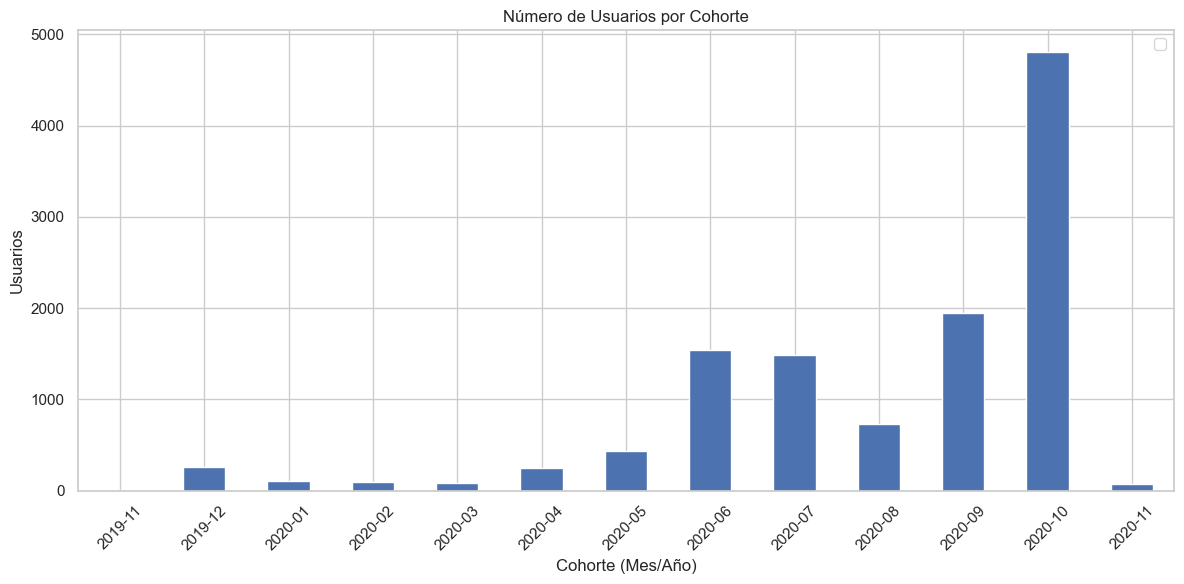

In [146]:
# Gràfico de barras para visualizar el número de usuarios por cohorte
plt.figure(figsize=(10, 6))
#users_by_cohort.plot(kind='line', marker='o')
users_by_cohort.plot(kind='bar')
plt.title('Número de Usuarios por Cohorte')
plt.xlabel('Cohorte (Mes/Año)')
plt.ylabel('Usuarios')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend([])
plt.tight_layout()
plt.show()

## 1. Frecuencia de uso del servicio

### 1.1. Peticiones por cohorte

In [147]:
# Frecuencia de uso del servicio por cohorte
requests_by_cohort = cash_cohorts.groupby('cohorte')['cash_request_id'].nunique().reset_index()
requests_by_cohort.columns = ['cohorte','num_requests']
print(requests_by_cohort)

    cohorte  num_requests
0   2019-11             8
1   2019-12          1080
2   2020-01           354
3   2020-02           441
4   2020-03           371
5   2020-04           952
6   2020-05          1660
7   2020-06          5266
8   2020-07          4147
9   2020-08          1632
10  2020-09          2925
11  2020-10          5058
12  2020-11            76


In [148]:
# Cambiar índice para poder graficar
requests_by_cohort.set_index('cohorte', inplace=True)
print(requests_by_cohort.index)

Index(['2019-11', '2019-12', '2020-01', '2020-02', '2020-03', '2020-04',
       '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10',
       '2020-11'],
      dtype='object', name='cohorte')


In [149]:
requests_by_cohort

,num_requests
cohorte,
2019-11,8
2019-12,1080
2020-01,354
2020-02,441
2020-03,371
2020-04,952
2020-05,1660
2020-06,5266
2020-07,4147


In [150]:
# Comprobación
requests_by_cohort['num_requests'].sum()

23970

<Figure size 1000x600 with 0 Axes>

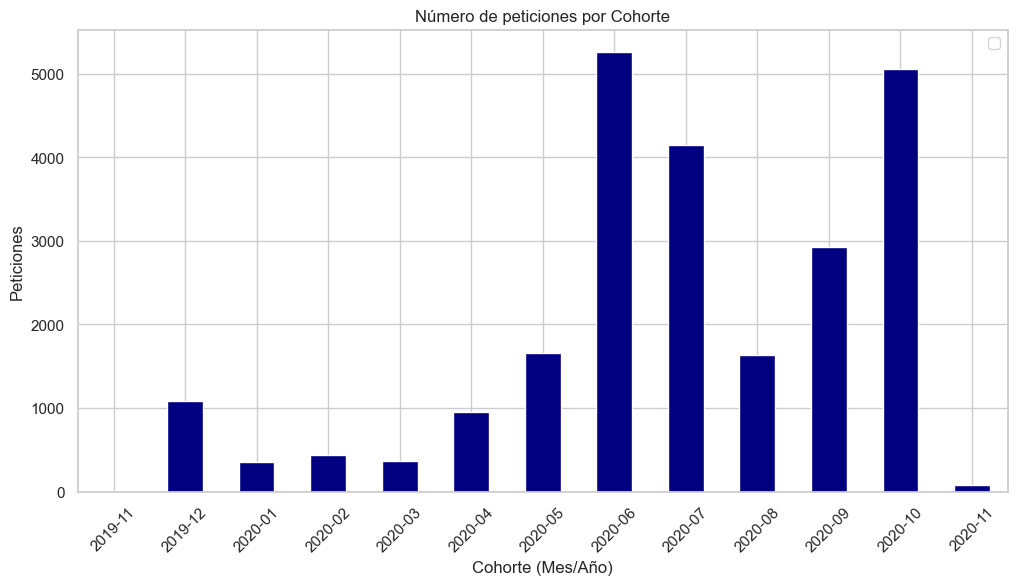

In [151]:
# Crear un gráfico de barras para visualizar el número de requests por cohorte
plt.figure(figsize=(10, 6))
#requests_by_cohort.plot(kind='line', marker='o')
requests_by_cohort.plot(kind='bar', color='navy')
plt.title('Número de peticiones por Cohorte')
plt.xlabel('Cohorte (Mes/Año)')
plt.ylabel('Peticiones')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend([])
plt.show()

### 1.2. Frecuencia de uso

In [152]:
# Añadir columna 'created_at_month' para determinar el mes de creación de cada petición
cash_cohorts['created_at_month'] = cash_cohorts['created_at'].dt.to_period('M')
subset = ['cash_request_id','created_at_month','cohorte','id_usuario']
cash_cohorts[subset]

/var/folders/3h/d4zpwm_x4qg78bc5337r4q240000gq/T/ipykernel_5761/294293259.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash_cohorts['created_at_month'] = cash_cohorts['created_at'].dt.to_period('M')


,cash_request_id,created_at_month,cohorte,id_usuario
0,5,2019-12,2019-12,804
1,70,2019-12,2019-12,231
2,7,2019-12,2019-12,191
3,10,2019-12,2019-12,761
4,1594,2020-05,2020-05,7686
...,...,...,...,...
23965,20616,2020-10,2020-06,13681
23966,25243,2020-10,2020-10,30367
23967,22357,2020-10,2020-10,82122
23968,20256,2020-10,2020-10,64517


In [153]:
# Frecuencia de uso del servicio por cohorte
# frequency_by_cohort = cash_cohorts[subset].groupby(['created_at_month','cohorte'])['cash_request_id'].count().reset_index()
# frequency_by_cohort.set_index('created_at_month', inplace=True)
# frequency_by_cohort.columns = ['cohorte','num_transactions']
# print(frequency_by_cohort)

frequency_by_cohort = cash_cohorts[subset].groupby(['created_at_month','cohorte'])['cash_request_id'].count().reset_index()
frequency_by_cohort.sort_values(by=['created_at_month','cohorte'])
frequency_by_cohort.set_index(['created_at_month','cohorte'], inplace=True)
#frequency_by_cohort.columns = ['created_at_month','cohorte','num_requests']
frequency_by_cohort.rename(columns={'cash_request_id': 'num_requests'}, inplace=True)
frequency_by_cohort.iloc[0:50]

num_requests
created_at_month cohorte              
2019-11          2019-11             1
2019-12          2019-11             1
                 2019-12           288
2020-01          2019-12           106
                 2020-01           117
2020-02          2019-12            63
                 2020-01            24
                 2020-02            97
2020-03          2019-12            79
                 2020-01            17
                 2020-02            49
                 2020-03            99
2020-04          2019-11             1
                 2019-12            82
                 2020-01            35
                 2020-02            49
                 2020-03            42
                 2020-04           264
2020-05          2019-11             1
                 2019-12            86
                 2020-01            31
                 2020-02            45
                 2020-03            46
                 2020-04           150
                 2020-05           478
2020-06          2019-12            91
                 2020-01            29
                 2020-02            45
                 2020-03            47
                 2020-04           151
                 2020-05           318
                 2020-06          1934
2020-07          2019-12            72
                 2020-01            31
                 2020-02            45
                 2020-03            40
                 2020-04           116
                 2020-05           274
                 2020-06          1027
                 2020-07          1996
2020-08          2019-11             1
                 2019-12            84
                 2020-01            22
                 2020-02            44
                 2020-03            36
                 2020-04           107
                 2020-05           232
                 2020-06           957
                 2020-07           941
                 2020-08           993

In [154]:
# Comprobación: la suma debe dar el número total de peticiones, o sea 23970
frequency_by_cohort['num_requests'].sum()

23970

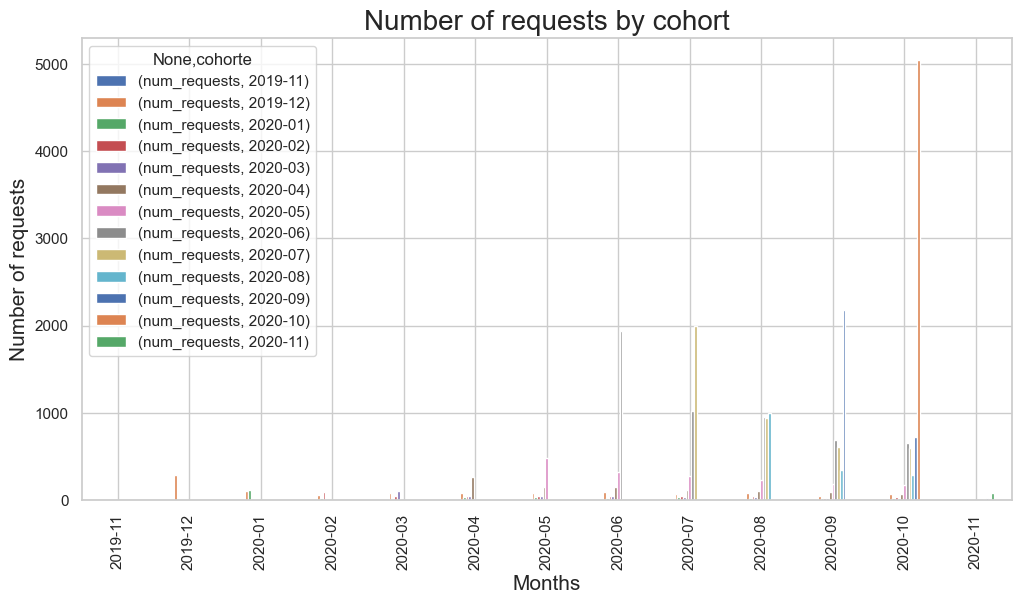

In [155]:
# Unstack multi-index
requests_for_plot = frequency_by_cohort.unstack()
# Crear gráfico!!!
requests_for_plot.plot(kind="bar")
plt.xlabel("Months", fontsize=15)
plt.ylabel("Number of requests", fontsize=15)
plt.title("Number of requests by cohort", fontsize=20)
plt.show()

## 2. Tasa de incidentes

### Explorar tabla fees

In [167]:
fees.head()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [ ]:
fees.shape

(21061, 13)

In [205]:
fees.info() # cash_request_id  21057 non-null  float64 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


In [206]:
fees[fees['cash_request_id'].isna()] # Hay 4 valores NaN en columna 'cash_request_id'!!!

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
1911,2990,NaN,instant_payment,cancelled,NaN,5.0,Instant Payment Cash Request 11164,2020-08-06 22:42:34.525373+00,2020-11-04 16:01:17.296048+00,NaN,NaN,NaN,after
1960,3124,NaN,instant_payment,cancelled,NaN,5.0,Instant Payment Cash Request 11444,2020-08-08 06:33:06.244651+00,2020-11-04 16:01:08.332978+00,NaN,NaN,NaN,after
4605,5185,NaN,instant_payment,cancelled,NaN,5.0,Instant Payment Cash Request 11788,2020-08-26 09:39:37.362933+00,2020-11-04 16:01:36.492576+00,NaN,NaN,NaN,after
11870,3590,NaN,instant_payment,cancelled,NaN,5.0,Instant Payment Cash Request 12212,2020-08-12 14:20:06.657075+00,2020-11-04 16:01:53.106416+00,NaN,NaN,NaN,after


In [288]:
# Recuperar el valor de 'cash_request_id' a partir de 'reason', para esas 4 filas
valores_id = fees[fees['cash_request_id'].isna()]['id'] # 'id' = [2990,3124,5185,3590]
valores_id
fees[fees['id'].isin(valores_id)]

extract_crid = lambda x: float(x.split(" ")[-1])
crid_values = fees[fees['cash_request_id'].isna()]['reason'].transform(extract_crid)
crid_values

reason_dic = { 'cash_request_id' : crid_values}

fees.fillna(reason_dic, inplace=True)

# Comprobación
fees[fees['id'].isin(valores_id)]

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
1911,2990,11164.0,instant_payment,cancelled,NaN,5.0,Instant Payment Cash Request 11164,2020-08-06 22:42:34.525373+00,2020-11-04 16:01:17.296048+00,NaN,NaN,NaN,after
1960,3124,11444.0,instant_payment,cancelled,NaN,5.0,Instant Payment Cash Request 11444,2020-08-08 06:33:06.244651+00,2020-11-04 16:01:08.332978+00,NaN,NaN,NaN,after
4605,5185,11788.0,instant_payment,cancelled,NaN,5.0,Instant Payment Cash Request 11788,2020-08-26 09:39:37.362933+00,2020-11-04 16:01:36.492576+00,NaN,NaN,NaN,after
11870,3590,12212.0,instant_payment,cancelled,NaN,5.0,Instant Payment Cash Request 12212,2020-08-12 14:20:06.657075+00,2020-11-04 16:01:53.106416+00,NaN,NaN,NaN,after


In [306]:
# Conversión de float a int, para poder enlazarlo con la tabla cash
fees['cash_request_id'] = fees['cash_request_id'].astype(int)

In [307]:
fees['type'].value_counts()

type
instant_payment    11099
postpone            7766
incident            2196
Name: count, dtype: int64

### Comprobar relación entre tablas cash y fees

In [313]:
# Comprobar relación entre ambas tablas, que debería ser a través de la columna 'cash_request_id'
#fees[fees['cash_request_id']==1594] # Primeras cinco filas de cash: 5 70 7 10 1594
#fees[fees['cash_request_id'].isin([5,70,7,10,1594])]
#cash_cohorts['cash_request_id'].values[0:100]
#fees[fees['cash_request_id'].isin(cash_cohorts['cash_request_id'].values)].shape
cash_cohorts[~cash_cohorts['cash_request_id'].isin(fees['cash_request_id'].values)].shape # 11037 entradas en tabla cash NO tienen su correspondiente en la tabla fees, basándonos en 'cash_request_id'
cash_cohorts[~cash_cohorts['cash_request_id'].isin(fees['cash_request_id'].values)].sample(50)
cash_cohorts[~cash_cohorts['cash_request_id'].isin(fees['cash_request_id'].values)]['status'].value_counts()

status
rejected                 6568
money_back               4352
direct_debit_rejected      83
canceled                   29
active                      3
direct_debit_sent           2
Name: count, dtype: int64

In [181]:
cash_cohorts.columns

Index(['cash_request_id', 'amount', 'status', 'created_at', 'user_id',
       'deleted_account_id', 'id_usuario', 'cohorte', 'created_at_month'],
      dtype='object')

In [182]:
fees.columns

Index(['id', 'cash_request_id', 'type', 'status', 'category', 'total_amount',
       'reason', 'created_at', 'updated_at', 'paid_at', 'from_date', 'to_date',
       'charge_moment'],
      dtype='object')

In [321]:
# Seleccionar sólo columnas que interesan para la tasa de incidencias
# fees = fees[['id', 'cash_request_id', 'type', 'status', 'total_amount',
#        'created_at', 'updated_at']]
fees = fees[['id', 'cash_request_id', 'type', 'status', 'total_amount']]

### Unir tablas cash y fees

In [322]:
print(cash_cohorts.shape)
print(fees.shape)

(23970, 9)
(21061, 5)


In [323]:
merged = pd.merge(cash_cohorts, fees, on='cash_request_id')
print(merged.shape)
merged.head()

(21057, 13)


,cash_request_id,amount,status_x,created_at,user_id,deleted_account_id,id_usuario,cohorte,created_at_month,id,type,status_y,total_amount
0,23534,25.0,money_back,2020-10-23 15:20:26.163927+00:00,21465.0,NaN,21465,2020-09,2020-10,16460,instant_payment,accepted,5.0
1,2203,100.0,money_back,2020-05-27 02:26:27.615190+00:00,2109.0,NaN,2109,2019-12,2020-05,100,postpone,accepted,5.0
2,6098,100.0,active,2020-07-01 09:30:03.145410+00:00,23328.0,NaN,23328,2020-07,2020-07,3733,postpone,cancelled,5.0
3,6098,100.0,active,2020-07-01 09:30:03.145410+00:00,23328.0,NaN,23328,2020-07,2020-07,3734,postpone,cancelled,5.0
4,6098,100.0,active,2020-07-01 09:30:03.145410+00:00,23328.0,NaN,23328,2020-07,2020-07,3735,postpone,cancelled,5.0
